# Topic Modeling

### Generating a word cloud

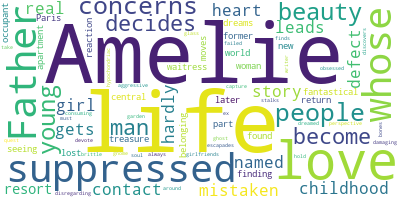

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud

with open("../data/ameliepoulain.txt") as infile:
    long_string = infile.read()
          
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### Convert a string into a list of lower-cased, deaccented tokens.
[Gensim preprocess method](https://tedboy.github.io/nlps/generated/generated/gensim.utils.simple_preprocess.html)
Input: a string

Output: a list of  tokens

In [12]:
import gensim
from gensim.utils import simple_preprocess

text = ["john saw the cat near john","john saw the dog"]

def sent_to_words(text):   
    return [gensim.utils.simple_preprocess(str(sentence), deacc=True) for sentence in text]  
    # deacc=True removes accents
    
# print out the tokens
tokens = sent_to_words(text)
print(tokens)


[['john', 'saw', 'the', 'cat', 'near', 'john'], ['john', 'saw', 'the', 'dog']]


###  Use Gensim [dictionary method](https://www.tutorialspoint.com/gensim/gensim_creating_a_dictionary.htm) to create a dictionary

TOKEN -> IDENTIFIER

* the dictionary maps each token in the corpus to an integer 
* this integer is then used as an identifier for that token
* Gensim uses the identifier rather than the tokens to build the document/tokens matrix and the LDA model

In [13]:
import gensim.corpora as corpora

# the input must be a list of lists of tokens
tokens = [['john', 'saw', 'the', 'cat', 'near', 'john'], ['john', 'saw', 'the', 'dog']]

# Create the word2id dictionary which maps each token to an integer (an identifier)
dic = corpora.Dictionary(tokens)

# How many tokens ?
print(dic)

Dictionary(6 unique tokens: ['cat', 'john', 'near', 'saw', 'the']...)


In [14]:
# Show dictionary
print(dic.token2id)

{'cat': 0, 'john': 1, 'near': 2, 'saw': 3, 'the': 4, 'dog': 5}


## Create a document/token matrix

Using Gensim [doc2bow method](https://tedboy.github.io/nlps/generated/generated/gensim.corpora.Dictionary.doc2bow.html) (from Corpora module) to convert a list of lists of tokens to a document/token matrix, a list of (token_id, token_count) tuples.

In [15]:
# Convert data to document/token matrix
doc_token_matrix = [dic.doc2bow(text) for text in tokens]

# The output matrix indicates for each input document the frequency of the tokens contained in that document 
print(doc_token_matrix)

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)], [(1, 1), (3, 1), (4, 1), (5, 1)]]


In [16]:
# doc0: ['john', 'saw', 'the', 'cat', 'near', 'john']
# token2id dictionary: {'cat': 0, 'john': 1, 'near': 2, 'saw': 3, 'the': 4, 'dog': 5}

# Get the document vector for doc0
print(doc_token_matrix[0])

# Result: [(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)]
# if we replace the identifiers by their corresponding tokens we get the following frequency vector for doc0
# [('cat', 1), ('john', 2), ('near', 1), ('saw', 1), ('the', 1)]

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)]


## Create LDA model
* input the document matrix and the word2id dictionary
* Read the [doc](https://radimrehurek.com/gensim/models/ldamodel.html) to understand the options
* id2word will create the inverse mapping from the word2id dictionary
    * the word2id dictionary maps a token to an integer which is used as its identifier   
    TOKEN -> ID
    * conversely id2word is a dictionary mapping a token identifier to the corresponding token   
    ID -> TOKEN

In [17]:

lda_model = gensim.models.LdaMulticore(corpus=doc_token_matrix,
                                       id2word=dic,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [18]:
# Print the token whose identifier is 3
lda_model.id2word[2]

'near'

In [19]:
# Show the identifier for the token "near"
dic.token2id['near']

2

In [20]:
#print Document/Token vector for the first document in the document/token matrix
# for 
print(doc_token_matrix[0])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)]


In [23]:
# John saw the cat near John
# {'cat': 0, 'john': 1, 'near': 2, 'saw': 3, 'the': 4, 'dog': 5}
# [(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)]
# < cat:1, john:2, near:1, saw:1,the:1 >

for i,j in doc_token_matrix[0]:
    token = lda_model.id2word[i]
    print (token,j)

cat 1
john 2
near 1
saw 1
the 1


### View the keywords for each topic and the weight of each keyword for that topic

In [24]:
from pprint import pprint
# Print the Keywords in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.167*"john" + 0.167*"saw" + 0.167*"the" + 0.167*"dog" + 0.167*"near" + '
  '0.167*"cat"'),
 (1,
  '0.167*"john" + 0.167*"saw" + 0.167*"the" + 0.167*"dog" + 0.167*"near" + '
  '0.167*"cat"'),
 (2,
  '0.239*"saw" + 0.239*"the" + 0.239*"dog" + 0.239*"john" + 0.022*"cat" + '
  '0.022*"near"'),
 (3,
  '0.167*"john" + 0.167*"the" + 0.167*"saw" + 0.167*"dog" + 0.167*"near" + '
  '0.167*"cat"'),
 (4,
  '0.167*"saw" + 0.167*"john" + 0.167*"the" + 0.167*"dog" + 0.167*"cat" + '
  '0.167*"near"'),
 (5,
  '0.318*"john" + 0.167*"cat" + 0.167*"near" + 0.167*"the" + 0.167*"saw" + '
  '0.015*"dog"'),
 (6,
  '0.167*"the" + 0.167*"john" + 0.167*"saw" + 0.167*"dog" + 0.167*"cat" + '
  '0.167*"near"'),
 (7,
  '0.167*"saw" + 0.167*"the" + 0.167*"john" + 0.167*"dog" + 0.167*"cat" + '
  '0.167*"near"'),
 (8,
  '0.167*"john" + 0.167*"saw" + 0.167*"the" + 0.167*"near" + 0.167*"dog" + '
  '0.167*"cat"'),
 (9,
  '0.167*"the" + 0.167*"john" + 0.167*"saw" + 0.167*"dog" + 0.167*"near" + '
  '0.167*"cat"')]


### Computing  Coherence Scores

Coherence measures score a topic by measuring the degree of semantic similarity between high scoring words in the topic.
* C_v measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
* C_p is based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson's coherence
* C_uci measure is based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
* C_umass is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure
* C_npmi is an enhanced version of the C_uci coherence using the normalized pointwise mutual information (NPMI)
* C_a is based on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarit

In [25]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=dic, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.527170211699483
